In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 2.4 MB/s eta 0:00:24
   - -------------------------------------- 1.6/56.8 MB 2.8 MB/s eta 0:00:20
   - -------------------------------------- 2.4/56.8 MB 3.1 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/56.8 MB 3.6 MB/s eta 0:00:15
   --- ------------------------------------ 4.7/56.8 MB 4.0 MB/s eta 0:00:14
   ---- ----------------------------------- 6.0/56.8 MB 4.3 MB/s eta 0:00:12
   ----- ---------------------------------- 7.3/56.8 MB 4.6 MB/s eta 0:00:11
   ------ --------------------------------- 8.7/56.8 MB 4.8 MB/s eta 0:00:11
   ------- -------------------------------- 10.0/56.8 MB 4.9 MB/s eta 0:00:10
   -------- ------------------------------- 11.5/56.8 MB 5.1 MB/s eta 0:00:09
   --------- ------------------------------ 12.8/56.8 MB 5.2 MB/s eta 0:00:09
   -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (8)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop irrelevant column
df = df.drop("customerID", axis=1)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical variables using OneHotEncoder
df = pd.get_dummies(df, drop_first=True)

# Split dataset
X = df.drop("Churn_Yes", axis=1)  # 'Churn_Yes' becomes 1 if customer churned
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#MOdel Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:56:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [6]:
 #Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score

models = {"Logistic": lr, "RandomForest": rf, "XGBoost": xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Report:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("-"*40)

Logistic Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC-AUC: 0.7505576718043206
----------------------------------------
RandomForest Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.6851962073141697
----------------------------------------
XGBoost Report:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1036
        True       0.63      0.50      0.56  

In [7]:
#Handle Class Imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

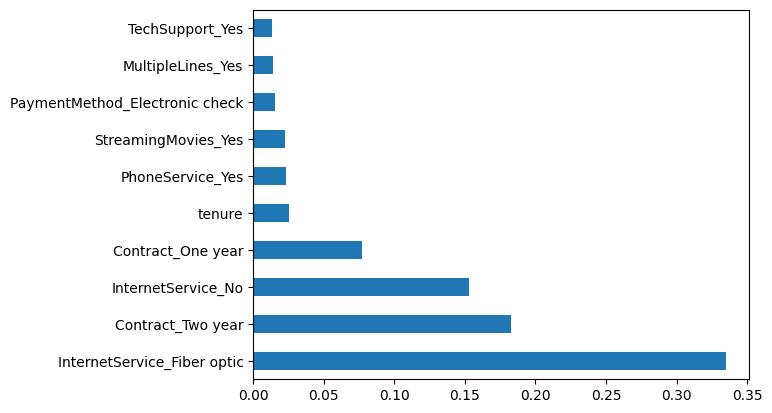

In [8]:
#Feature Importance & Business Insight
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [9]:
#Deployment
import joblib
joblib.dump(xgb, "churn_model.pkl")

['churn_model.pkl']